In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#### Load Datasets  
_Change the value of `ds` to change dataset_

In [2]:
# Change this line to change dataset between (ds = 1) and (ds = 2)
ds = 2

info = pd.read_csv('data/info_{0}.csv'. format(ds), index_col=0)
train_data = pd.read_csv('data/train_{0}.csv'.format(ds), header=None)
test_data = pd.read_csv('data/test_with_label_{0}.csv'.format(ds), header=None)

model_name = 'Base-DT'
output_csv = "output/{0}-DS{1}.csv".format(model_name, ds)

In [3]:
# Data definitions
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

#### Fit Data

In [4]:
BaseDT_model = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train,y_train)

#### Make Prediction

In [5]:
y_pred = pd.Series(BaseDT_model.predict(X_test))

#### Output Prediction

In [6]:
y_pred.to_csv(output_csv, header=None)

#### Output Confusion Matrix and Plot

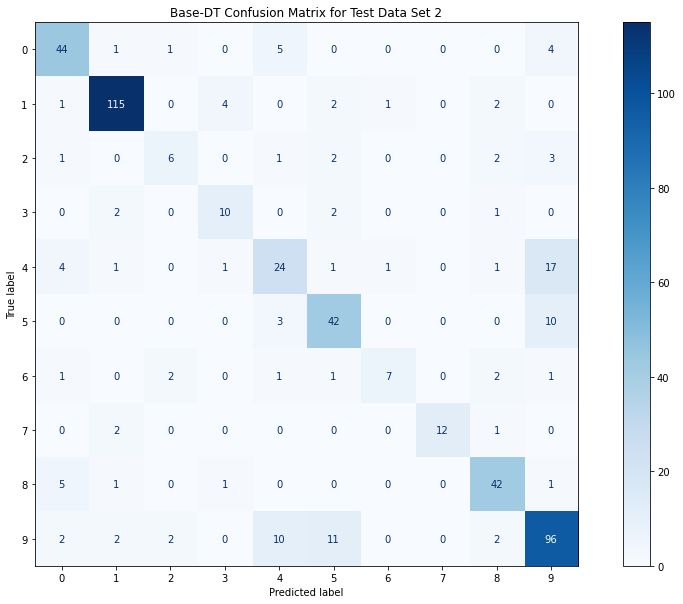

In [7]:
outmatrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(BaseDT_model, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('{0} Confusion Matrix for Test Data Set {1}'.format(model_name, ds))
plt.savefig('img/{0}_confusion_matrix_DS{1}'.format(model_name, ds))
plt.show()

#### Compute Metrics per Class

In [8]:
def compute_metrics(df, y_true, y_pred):
    df_metrics = pd.DataFrame(classification_report(y_true, y_pred, target_names=df['symbol'], output_dict=True, zero_division=0)).T
    df_metrics['symbol'] = df_metrics.index
    df_metrics
    return pd.merge(df, df_metrics, how='right')

info = compute_metrics(info, y_test, y_pred)
info.to_csv(output_csv, mode='a')
info

,symbol,precision,recall,f1-score,support
0,pi,0.758621,0.800000,0.778761,55.000000
1,alpha,0.927419,0.920000,0.923695,125.000000
2,beta,0.545455,0.400000,0.461538,15.000000
3,sigma,0.625000,0.666667,0.645161,15.000000
4,gamma,0.545455,0.480000,0.510638,50.000000
5,delta,0.688525,0.763636,0.724138,55.000000
6,lambda,0.777778,0.466667,0.583333,15.000000
7,omega,1.000000,0.800000,0.888889,15.000000
8,mu,0.792453,0.840000,0.815534,50.000000
9,xi,0.727273,0.768000,0.747082,125.000000


#### Compute Metrics for the Model

In [9]:
def compute_scores(y_test, y_pred):
    return [
        sklearn.metrics.accuracy_score(y_test, y_pred),
        sklearn.metrics.f1_score(y_test, y_pred, average='macro'),
        sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
    ]

model_desc = pd.DataFrame(index=['accuracy', 'macro-average-f1', 'weighted-average-f1'])

model_desc['DS{}'.format(ds)] = compute_scores(y_test, y_pred)
model_desc['DS{}'.format(ds)].to_frame().T.to_csv(output_csv, mode='a')
model_desc

,DS2
accuracy,0.765385
macro-average-f1,0.707877
weighted-average-f1,0.762498
